In [1]:
from models.tiny_vgg import TinyVGG
import torch
import yaml

device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the checkpoint of the best model
run_name = "TinyVGG_run_3_09290127_best"
model_checkpoint_path = f"checkpoints/{run_name}.pth"
config_path = "run_config/run_3.yaml"
with open(config_path, "r") as f:
    config = yaml.safe_load(f)
model = TinyVGG(
    hidden_units=config["model"]["hidden_units"],
    input_shape=3,
    output_shape=10,
    batch_norm=config["model"]["batch_norm"],
    dropout=config["model"]["dropout"],
)
model.load_state_dict(torch.load(model_checkpoint_path))
model.to(device)
model.eval()

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): F

# Evaluate on Test Set

In [2]:
from PIL import Image

In [3]:
import torch
from torchmetrics.classification import Accuracy
from utils.data_loading import load_cifar10
from torch import nn
from utils.epoch_core import test_epoch


test_loader = load_cifar10(
    train=False, num_workers=0, batch_size=64, return_loader=True
)

In [4]:
counts = torch.bincount(torch.tensor(test_loader.dataset.targets, dtype=torch.int64))
for label, count in enumerate(counts):
    print(
        f"Label {label}: {count.item()} samples, {count.item() / len(test_loader.dataset) * 100:.2f}% of dataset"
    )


Label 0: 1000 samples, 10.00% of dataset
Label 1: 1000 samples, 10.00% of dataset
Label 2: 1000 samples, 10.00% of dataset
Label 3: 1000 samples, 10.00% of dataset
Label 4: 1000 samples, 10.00% of dataset
Label 5: 1000 samples, 10.00% of dataset
Label 6: 1000 samples, 10.00% of dataset
Label 7: 1000 samples, 10.00% of dataset
Label 8: 1000 samples, 10.00% of dataset
Label 9: 1000 samples, 10.00% of dataset


In [ ]:


accuracy_metric = Accuracy(task="multiclass", num_classes=10).to(device)

# 2. Load test data
# test_loader = load_cifar10(train=False, num_workers=0, return_loader=True)[0]

# 3. Loss and metric
loss_fn = nn.CrossEntropyLoss(reduction="sum")
accuracy_metric = Accuracy(task="multiclass", num_classes=10).to(device)

# 4. Run test epoch
test_loss, test_accuracy, preds = test_epoch(
    model, test_loader, loss_fn, accuracy_metric, device, return_preds=True
)

print(f"Test loss: {test_loss / len(test_loader.dataset):.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")


In [22]:
from torchmetrics import ConfusionMatrix

# Concatenate predictions
all_preds = torch.stack(preds)

# Get all true labels
all_labels = torch.tensor([y for x, y in test_loader.dataset], device=device)

# Confusion matrix
cm = ConfusionMatrix(task="multiclass", num_classes=10).to(device)
cm_tensor = cm(all_preds, all_labels)


C:\Users\Dag\AppData\Local\Temp\ipykernel_15440\692802205.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


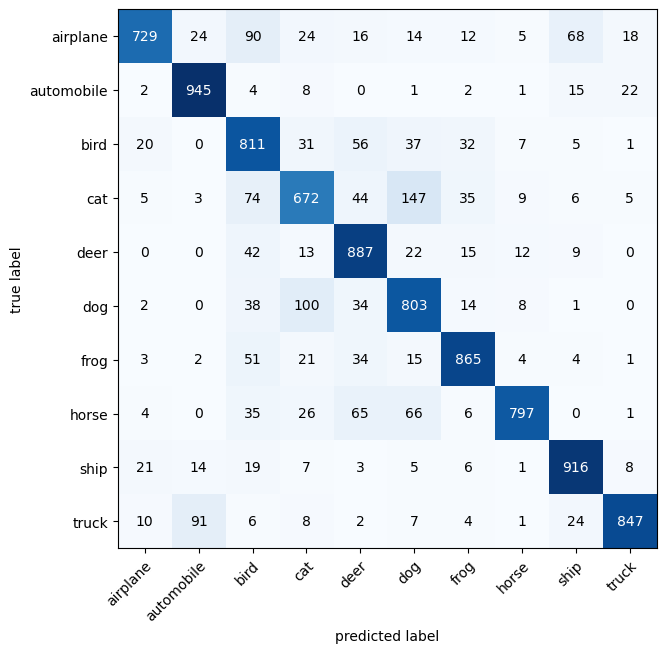

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=cm_tensor.to("cpu").numpy(),  
    class_names=test_loader.dataset.classes,  # turn the row and column labels into class names
    figsize=(10, 7),
)
fig.show()
